In [33]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = True
theme, cs = rp.mpl_setup(is_dark)
rp.plotly_setup(is_dark)

In [ ]:
%cd ~/programs/avid

In [ ]:
from pathlib import Path
import pyrallis
from avid.config import MainConfig
import orbax.checkpoint as ocp

from avid.e_form_predictor import TrainingRun
from avid.checkpointing import best_ckpt

# run_dir = Path('logs') / '03-17:45_918'
run_dir = Path('logs') / 'e_form_mae_481'

with open(run_dir / 'config.toml') as conf_file:
    config = pyrallis.cfgparsing.load(MainConfig, conf_file)

ckpt = best_ckpt(run_dir)

In [ ]:
from avid.utils import debug_structure


debug_structure(ckpt['state']);

In [ ]:
params = ckpt['state']['params']['params']
debug_structure(params);

In [26]:
from avid.utils import ELEM_VALS
spec_emb = params['SpeciesEmbed_0']['species_embed']['embedding']

spec_df = pd.DataFrame(spec_emb, index=ELEM_VALS)
spec_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Li,0.409020,0.037879,0.105534,0.023738,0.069815,-0.139052,-0.116438,-0.058331,0.231042,0.172821,...,-0.185256,0.000851,0.060645,0.022731,-0.243073,-0.121570,0.156642,-0.026249,0.139965,0.111653
Be,-0.006835,-0.012022,-0.186060,0.080657,0.071632,-0.121690,0.223714,0.335944,-0.403637,0.115383,...,-0.004938,-0.365140,-0.392646,-0.126230,-0.300310,0.206696,-0.251129,0.061237,0.017979,0.323815
B,-0.073149,0.137599,-0.361364,0.166141,0.202356,-0.130440,0.339085,0.066052,-0.357112,0.267094,...,-0.132578,-0.233452,-0.394949,-0.221688,-0.212424,0.298080,-0.246936,0.115081,0.243825,0.263939
N,-0.065946,0.081323,-0.053750,0.110301,0.063235,-0.003543,0.038538,0.290344,-0.147265,-0.072369,...,-0.075340,0.022189,0.018573,0.012577,-0.032753,0.084658,-0.068518,0.038352,0.016675,0.120676
O,-0.182359,-0.227877,0.023448,-0.003334,-0.165716,-0.020604,-0.195496,-0.222394,0.129901,-0.134440,...,0.084126,0.132568,-0.069695,0.001409,0.139075,-0.036907,0.003230,-0.080432,-0.240740,-0.194893
F,-0.004189,0.157981,0.017149,-0.316983,-0.131147,-0.027423,-0.085748,-0.189259,0.226202,-0.034043,...,-0.241727,0.058969,-0.064737,0.267320,0.035228,-0.111887,0.022419,0.158668,-0.153878,-0.272428
Na,0.075789,-0.096927,0.052577,0.204426,-0.000330,0.130449,-0.124596,-0.095617,0.065346,0.249820,...,0.049827,-0.243828,0.100682,-0.041699,0.056781,-0.219892,0.167241,0.142538,0.279415,0.192419
Mg,0.104890,-0.242641,0.212421,-0.128086,-0.144541,0.141773,-0.071452,-0.155274,-0.077618,0.315965,...,0.035707,-0.017396,0.142803,-0.069081,-0.012227,0.096240,0.099940,-0.011151,0.283799,-0.020757
Al,-0.048770,0.086700,-0.176564,-0.041482,-0.168796,-0.219245,0.376263,0.154831,0.002600,0.027822,...,-0.014702,-0.290716,-0.151399,0.076068,-0.036283,0.184967,-0.137993,-0.205881,0.105944,0.054437
Si,-0.123213,0.351820,-0.252264,0.106331,0.004454,-0.344196,0.370721,0.028648,0.081880,0.053311,...,-0.166500,-0.275456,-0.100371,-0.110559,-0.151067,0.344883,-0.000736,-0.169282,0.024600,0.141425


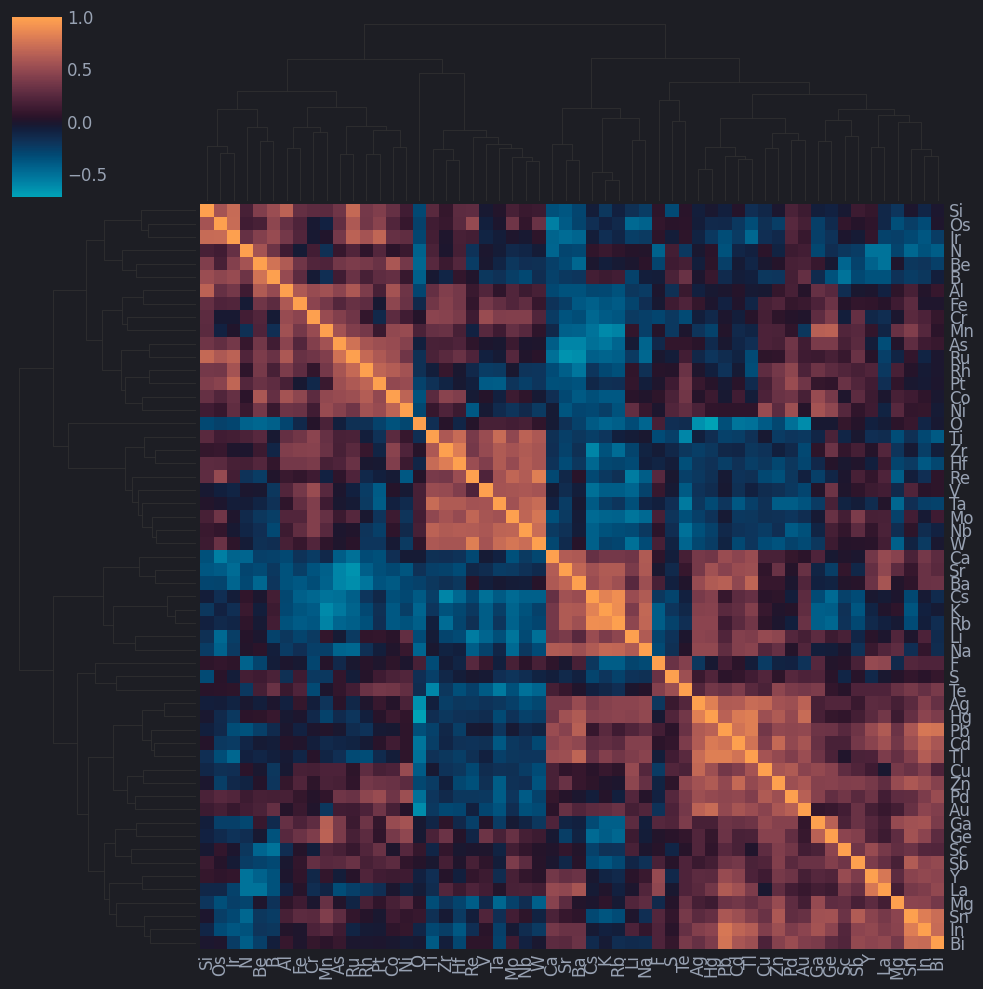

In [34]:
sns.clustermap(spec_df.T.corr(), xticklabels=1, yticklabels=1, cmap='rho_diverging', center=0)

<Axes: >

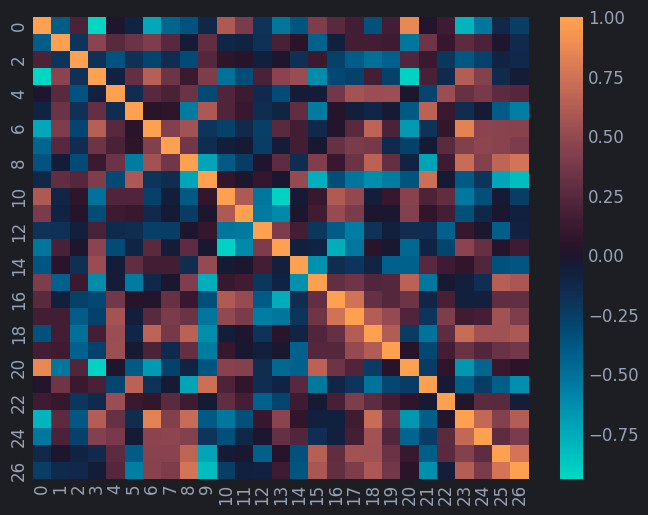

In [36]:
pos_emb = params['pos_embed']['pos_embedding']

sns.heatmap(jnp.corrcoef(pos_emb), cmap='rho_diverging', center=0)